The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|                                                                                          | 0/320 [00:00<?, ?it/s]

epoch 1 of 1


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:05<00:00, 15.80it/s]


tensor(0.1562)


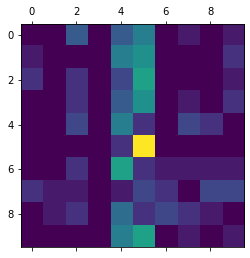

In [9]:
%load_ext autoreload
%autoreload 2

# built-in libraries
import os 

# third party libraries
import torch

# local modules
import dataset
import models
import train

SHREC14 =  "../../Downloads/Mesh-Datasets/MyShrec14"
PARAMS_FILE = "../model_data/SHREC14.pt"

traindata = dataset.Shrec14Dataset(SHREC14, train=True, test=False)
testdata = dataset.Shrec14Dataset(SHREC14, train=False, test=True)

model = models.chebynet.ChebnetClassifier_SHREC14(
        nums_conv_units=[32,32,16,16],
        num_classes=traindata.num_classes,
        parameters_file=PARAMS_FILE)

#train network
train.train_SHREC14(
    train_data=traindata,
    classifier=model,
    parameters_file=PARAMS_FILE,
    learning_rate=3e-4,
    epoch_number=1)

accuracy, confusion = train.evaluate_SHREC14(
    eval_data=testdata,
    classifier=model,
    epoch_number=2)

import matplotlib.pyplot as plt

print(accuracy)
plt.matshow(confusion)
plt.show()

In [ ]:
import plotly
import plotly.graph_objects as go
import numpy as np

def visualize(pos, faces, intensity=None):
  cpu = torch.device("cpu")
  if type(pos) != np.ndarray:
    pos = pos.to(cpu).clone().detach().numpy()
  if pos.shape[-1] != 3:
    raise ValueError("Vertices positions must have shape [n,3]")
  if type(faces) != np.ndarray:
    faces = faces.to(cpu).clone().detach().numpy()
  if faces.shape[-1] != 3:
    raise ValueError("Face indices must have shape [m,3]") 
  if intensity is None:
    intensity = np.ones([pos.shape[0]])
  elif type(intensity) != np.ndarray:
    intensity = intensity.to(cpu).clone().detach().numpy()

  x, z, y = pos.T
  i, j, k = faces.T

  mesh = go.Mesh3d(x=x, y=y, z=z,
            color='lightpink',
            intensity=intensity,
            opacity=1,
            colorscale=[[0, 'gold'],[0.5, 'mediumturquoise'],[1, 'magenta']],
            i=i, j=j, k=k,
            showscale=True)
  layout = go.Layout(scene=go.layout.Scene(aspectmode="data")) 

  #pio.renderers.default="plotly_mimetype"
  fig = go.Figure(data=[mesh],
                  layout=layout)
  fig.update_layout(
      autosize=True,
      margin=dict(l=20, r=20, t=20, b=20),
      paper_bgcolor="LightSteelBlue")
  fig.show()

In [ ]:
COMA = "../../Downloads/Mesh-Datasets/MyComaDataset"

Coma = dataset.CoMADataset(COMA, train=True)
